In [ ]:
# Заходим в командную строку Anaconda Prompt и выполняем следующую команду: 
# для Windows 
#pip install psycopg2
# для MacOS
# pip install psycopg2-binary

In [3]:
# Создаем соединение Python с базой данных
# import getpass для скрытия пароля (необязательная команда)

import psycopg2 
import getpass  
conn=psycopg2.connect(user='postgres',
                      database='postgres', #проверяем, чтобы название совпадало с названием в вашей БЗ
                      host='localhost',
                      port='5432',
                      password=getpass.getpass('Insert password: ')
                        )
print(conn.get_dsn_parameters())

Insert password: ········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [2]:
# 1. Для периода 11.11.2014-11.11.2016 и типа рейтинга rat_id=24, присваиваемого агентством ЭкспертРА (EXP), построить 
# распределения допустивших и недопустивших дефолт заемщиков по рейтинговым категориям.


In [4]:
# Таблица содержащая заемщиков с типом рейтинга 14 (rat_id) за период 11.11.2014-11.11.2016, исключая снятые 
# и приостановленные рейтинги и для агенства ЭкспертРА (agency_id=EXP). Также таблица содержит случаи дефолта, 
# исключая случаи ликвидации компании.

import pandas as pd # импортируем библиотеку для работы с таблицами

query1="select public.ratings_info.\"rat_key\", \"rat_id\", \"agency_id\", \"grade\", \"change\", \"date\", \"ent_id\", \"grade_id\", \"default\" from public.ratings_info inner join (select \"rat_key\", \"grade\", \"change\", public.ratings_task.\"date\", public.ratings_task.\"ent_id\", \"grade_id\", \"event\" as \"default\" from public.ratings_task left join (select * from public.credit_events_task WHERE \"event\"='dft' AND \"ent_id\" IS NOT NULL AND \"date\" >= '11.11.2014' AND \"date\" <= '11.11.2016') as tbl2 on public.ratings_task.\"ent_id\"=tbl2.\"ent_id\" WHERE public.ratings_task.\"date\" >= '11.11.2014' AND public.ratings_task.\"date\" <= '11.11.2016') as tb1 on public.ratings_info.\"rat_key\"=tb1.\"rat_key\" where \"change\" <> 'снят'  and \"change\" <> 'приостановлен' and \"rat_id\" = 14 and \"agency_id\" = 'EXP';"
tbl1=pd.read_sql_query(query1,conn)
tbl1.head(10)

,rat_key,rat_id,agency_id,grade,change,date,ent_id,grade_id,default
0,14,14,EXP,A,повышен,2015-03-30,894,2,None
1,14,14,EXP,A,повышен,2014-12-22,1303,2,dft
2,14,14,EXP,A,подтвержден,2015-05-29,1303,2,dft
3,14,14,EXP,A,подтвержден,2016-04-12,1464,2,None
4,14,14,EXP,A,подтвержден,2015-04-29,1464,2,None
5,14,14,EXP,A,подтвержден,2015-02-26,1464,2,None
6,14,14,EXP,A,подтвержден,2015-08-05,760,2,None
7,14,14,EXP,A,подтвержден,2015-06-08,1463,2,None
8,14,14,EXP,A,подтвержден,2014-12-25,1463,2,None
9,14,14,EXP,A,подтвержден,2015-11-06,1451,2,None


In [5]:
# Группировка данных по типу рейтинговой категории (учитываются только заемщими, которые подверглись дефолту, так как 
# в остальных случаях значение в столбце default None - не учитывается).

group1=tbl1.groupby(['grade_id']).count()
group1

,rat_key,rat_id,agency_id,grade,change,date,ent_id,default
grade_id,,,,,,,,
0,21,21,21,21,21,21,21,2
1,63,63,63,63,63,63,63,3
2,234,234,234,234,234,234,234,22
3,242,242,242,242,242,242,242,60
4,71,71,71,71,71,71,71,32
5,27,27,27,27,27,27,27,20
6,13,13,13,13,13,13,13,12
7,5,5,5,5,5,5,5,4
8,8,8,8,8,8,8,8,8


In [6]:
# Создание отдельной таблицы, где указаны заемщики, которые не подверглись дефолту

tbl2=tbl1[['grade_id', 'rat_key', 'rat_id', 'agency_id', 'grade', 'change', 'date', 'ent_id', 'default']][(tbl1['default']!='dft')]
tbl2.head(10)

,grade_id,rat_key,rat_id,agency_id,grade,change,date,ent_id,default
0,2,14,14,EXP,A,повышен,2015-03-30,894,None
3,2,14,14,EXP,A,подтвержден,2016-04-12,1464,None
4,2,14,14,EXP,A,подтвержден,2015-04-29,1464,None
5,2,14,14,EXP,A,подтвержден,2015-02-26,1464,None
6,2,14,14,EXP,A,подтвержден,2015-08-05,760,None
7,2,14,14,EXP,A,подтвержден,2015-06-08,1463,None
8,2,14,14,EXP,A,подтвержден,2014-12-25,1463,None
9,2,14,14,EXP,A,подтвержден,2015-11-06,1451,None
10,2,14,14,EXP,A,подтвержден,2016-04-12,591,None
11,2,14,14,EXP,A,подтвержден,2015-05-29,591,None


In [7]:
# Переименование столбца default в non-default

tbl2 = tbl2.rename(columns = {tbl2.columns[-1] : 'non-default'})
tbl2.head(10)

,grade_id,rat_key,rat_id,agency_id,grade,change,date,ent_id,non-default
0,2,14,14,EXP,A,повышен,2015-03-30,894,None
3,2,14,14,EXP,A,подтвержден,2016-04-12,1464,None
4,2,14,14,EXP,A,подтвержден,2015-04-29,1464,None
5,2,14,14,EXP,A,подтвержден,2015-02-26,1464,None
6,2,14,14,EXP,A,подтвержден,2015-08-05,760,None
7,2,14,14,EXP,A,подтвержден,2015-06-08,1463,None
8,2,14,14,EXP,A,подтвержден,2014-12-25,1463,None
9,2,14,14,EXP,A,подтвержден,2015-11-06,1451,None
10,2,14,14,EXP,A,подтвержден,2016-04-12,591,None
11,2,14,14,EXP,A,подтвержден,2015-05-29,591,None


In [8]:
# Заменим None на NaN, т.е преобразуем столбец non-default в числовой тип данных

tbl2['non-default'] = pd.to_numeric(tbl2['non-default'], errors='coerce')
tbl2.head(10)

,grade_id,rat_key,rat_id,agency_id,grade,change,date,ent_id,non-default
0,2,14,14,EXP,A,повышен,2015-03-30,894,NaN
3,2,14,14,EXP,A,подтвержден,2016-04-12,1464,NaN
4,2,14,14,EXP,A,подтвержден,2015-04-29,1464,NaN
5,2,14,14,EXP,A,подтвержден,2015-02-26,1464,NaN
6,2,14,14,EXP,A,подтвержден,2015-08-05,760,NaN
7,2,14,14,EXP,A,подтвержден,2015-06-08,1463,NaN
8,2,14,14,EXP,A,подтвержден,2014-12-25,1463,NaN
9,2,14,14,EXP,A,подтвержден,2015-11-06,1451,NaN
10,2,14,14,EXP,A,подтвержден,2016-04-12,591,NaN
11,2,14,14,EXP,A,подтвержден,2015-05-29,591,NaN


In [9]:
 # замена отсутствующих данных в стобце non-default (None) на единицы

tbl2=tbl2.fillna(1)
tbl2.head(10)

,grade_id,rat_key,rat_id,agency_id,grade,change,date,ent_id,non-default
0,2,14,14,EXP,A,повышен,2015-03-30,894,1.0
3,2,14,14,EXP,A,подтвержден,2016-04-12,1464,1.0
4,2,14,14,EXP,A,подтвержден,2015-04-29,1464,1.0
5,2,14,14,EXP,A,подтвержден,2015-02-26,1464,1.0
6,2,14,14,EXP,A,подтвержден,2015-08-05,760,1.0
7,2,14,14,EXP,A,подтвержден,2015-06-08,1463,1.0
8,2,14,14,EXP,A,подтвержден,2014-12-25,1463,1.0
9,2,14,14,EXP,A,подтвержден,2015-11-06,1451,1.0
10,2,14,14,EXP,A,подтвержден,2016-04-12,591,1.0
11,2,14,14,EXP,A,подтвержден,2015-05-29,591,1.0


In [10]:
# Группировка данных по типу рейтинговой категории (учитываются только заемщими, которые не подверглись дефолту).

group2=tbl2.groupby(['grade_id']).count()
group2

,rat_key,rat_id,agency_id,grade,change,date,ent_id,non-default
grade_id,,,,,,,,
0,19,19,19,19,19,19,19,19
1,60,60,60,60,60,60,60,60
2,212,212,212,212,212,212,212,212
3,182,182,182,182,182,182,182,182
4,39,39,39,39,39,39,39,39
5,7,7,7,7,7,7,7,7
6,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1
10,2,2,2,2,2,2,2,2


In [11]:
# Объединение 2-х таблиц - group1 и group2. Построение распределения допустивших и недопустивших дефолт заемщиков 
# по рейтинговым категориям. Сортировка в порядке улучшения рейтинга.

group=pd.merge(group1,group2, on='grade_id',how='inner').sort_values('grade_id', ascending=False)
group

,rat_key_x,rat_id_x,agency_id_x,grade_x,change_x,date_x,ent_id_x,default,rat_key_y,rat_id_y,agency_id_y,grade_y,change_y,date_y,ent_id_y,non-default
grade_id,,,,,,,,,,,,,,,,
10,35,35,35,35,35,35,35,33,2,2,2,2,2,2,2,2
7,5,5,5,5,5,5,5,4,1,1,1,1,1,1,1,1
6,13,13,13,13,13,13,13,12,1,1,1,1,1,1,1,1
5,27,27,27,27,27,27,27,20,7,7,7,7,7,7,7,7
4,71,71,71,71,71,71,71,32,39,39,39,39,39,39,39,39
3,242,242,242,242,242,242,242,60,182,182,182,182,182,182,182,182
2,234,234,234,234,234,234,234,22,212,212,212,212,212,212,212,212
1,63,63,63,63,63,63,63,3,60,60,60,60,60,60,60,60
0,21,21,21,21,21,21,21,2,19,19,19,19,19,19,19,19


In [12]:
# Вывод из предыдущей таблицы необзодимой информации
dist1=group[['default','non-default']]
dist1

,default,non-default
grade_id,,
10,33,2
7,4,1
6,12,1
5,20,7
4,32,39
3,60,182
2,22,212
1,3,60
0,2,19


In [13]:
#Вспомогательный запрос для вывода рейтинговой категории

query_add="SELECT * FROM public.scale_exp_task;"
tbl_add=pd.read_sql_query(query_add,conn)
tbl_add

,grade,grade_id
0,A++,0
1,A+,1
2,A,2
3,B++,3
4,B+,4
5,B,5
6,C++,6
7,C+,7
8,C,8
9,D,9


In [14]:
# Добавляем рейтинговую категорию

dist2=pd.merge(dist1,tbl_add, on ='grade_id',how='inner').sort_values('grade_id', ascending=False)
dist2

,grade_id,default,non-default,grade
0,10,33,2,E
1,7,4,1,C+
2,6,12,1,C++
3,5,20,7,B
4,4,32,39,B+
5,3,60,182,B++
6,2,22,212,A
7,1,3,60,A+
8,0,2,19,A++


In [15]:
# Создание итогового распределения с нужными столбцами с сортировкой в порядке улучшения рейтинга.

dist=dist2[['grade','default', 'non-default']]
dist = dist.rename(columns = {dist.columns[0] : 'rating'})
dist


,rating,default,non-default
0,E,33,2
1,C+,4,1
2,C++,12,1
3,B,20,7
4,B+,32,39
5,B++,60,182
6,A,22,212
7,A+,3,60
8,A++,2,19


<function matplotlib.pyplot.show(*args, **kw)>

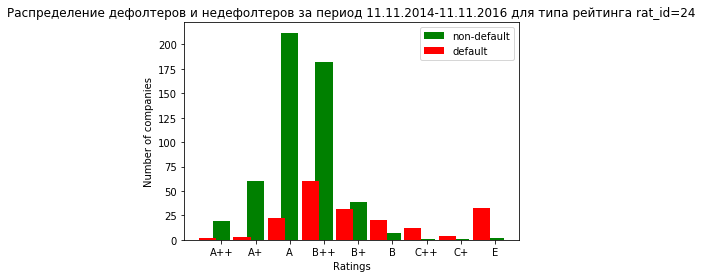

In [17]:
# 2. Визуализация распределения с помощью графиков вида bar в порядке ухудшения рейтинга.

import matplotlib.pyplot as plt # импортируем библиотеку для построения графиков

bar1=plt.bar(dist['rating'].index, dist['non-default'], width=0.5, label='non-default', color='g')
bar2=plt.bar(dist['rating'].index+0.4, dist['default'], width=0.5, label='default', color='r')

plt.xlabel('Ratings')
plt.ylabel('Number of companies')
plt.title('Распределение дефолтеров и недефолтеров ' + 'за период 11.11.2014-11.11.2016 для типа рейтинга rat_id=24')
plt.xticks(dist['rating'].index, dist['rating'])
plt.gca().invert_xaxis() #сортируем рейтинги в порядке ухудшения.
plt.legend()
plt.show

In [28]:
# Построение ROC кривой

# # Создание таблицы для построения ROC кривой

import numpy as np

# создание таблицы с суммированными столбцами, начиная с худшего рейтинга
roc_tbl = pd.DataFrame(index=dist.index)
roc_tbl['rating']=dist['rating']
roc_tbl['default_cumsum'] = dist['default'].cumsum()
roc_tbl['non-default_cumsum'] = dist['non-default'].cumsum()

roc_tbl

,rating,default_cumsum,non-default_cumsum
0,E,33,2
1,C+,37,3
2,C++,49,4
3,B,69,11
4,B+,101,50
5,B++,161,232
6,A,183,444
7,A+,186,504
8,A++,188,523


In [23]:
# Общее количество компаний - недефолтеров
x = dist['non-default'].sum()
x

523

In [25]:
# Общее количество компаний - дефолтеров
y = dist['default'].sum()
y

188

In [29]:
# Создание таблицы со значениями для ROC кривой

roc = pd.DataFrame(index=roc_tbl.index)
roc['rating']=roc_tbl['rating']
roc['default'] = roc_tbl['default_cumsum'] / y 
roc['non-default'] = roc_tbl['non-default_cumsum'] / x

roc

,rating,default,non-default
0,E,0.175532,0.003824
1,C+,0.196809,0.005736
2,C++,0.260638,0.007648
3,B,0.367021,0.021033
4,B+,0.537234,0.095602
5,B++,0.856383,0.443595
6,A,0.973404,0.848948
7,A+,0.989362,0.963671
8,A++,1.000000,1.000000


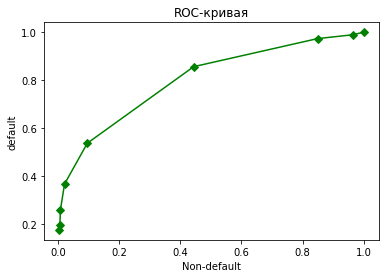

In [35]:
# Построение ROC кривой

plt.plot(roc['non-default'], roc['default'], marker='D', color='g')

plt.xlabel ('Non-default')
plt.ylabel ('default')
plt.title ('ROC-кривая')
plt.show()
